In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

from sklearn.preprocessing import StandardScaler

import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

In [2]:
train_data_dir = pathlib.Path("C:/Users/USER/Downloads/images/images/train")
print(train_data_dir)

test_data_dir = pathlib.Path("C:/Users/USER/Downloads/images/images/validation")
print(test_data_dir)

C:\Users\USER\Downloads\images\images\train
C:\Users\USER\Downloads\images\images\validation


In [3]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        r'C:\Users\USER\Downloads\Face Emotion Expression Detection\Face_emotion_images\images\train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
        r'C:\Users\USER\Downloads\Face Emotion Expression Detection\Face_emotion_images\images\validation',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
#we read train and validation images of 4 pms and set the images to set parameters.

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
#

In [4]:
# create model structure
emotion_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

emotion_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

emotion_model.summary()
# Train the neural network/model ..try using model.fit()
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

<ipython-input-4-df2c55a2c096>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/15
448/448 [==============================] - 180s 399ms/step - loss: 1.6956 - accuracy: 0.3146 - val_loss: 1.4929 - val_accuracy: 0.4281
Epoch 2/15
448/448 [==============================] - 131s 293ms/step - loss: 1.4130 - accuracy: 0.4542
Epoch 3/15
448/448 [==============================] - 130s 290ms/step - loss: 1.2796 - accuracy: 0.5114
Epoch 4/15
448/448 [==============================] - 135s 302ms/step - loss: 1.2068 - accuracy: 0.5389
Epoch 5/15
448/448 [==============================] - 133s 296ms/step - loss: 1.1566 - accuracy: 0.5613
Epoch 6/15
448/448 [==============================] - 138s 308ms/step - loss: 1.1143 - accuracy: 0.5796
Epoch 7/15
448/448 [==============================] - 137s 305ms/step - loss: 1.0637 - accuracy: 0.5978
Epoch 8/15
448/448 [==============================] - 147s 328ms/step - loss: 1.0251 - accuracy: 0.6116
Epoch 9/15
448/448 [==============================] - 183s 409ms/step - loss: 0.9924 - accuracy: 0.6231
Epoch 10/15
448/448 [=

In [5]:
print(emotion_model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


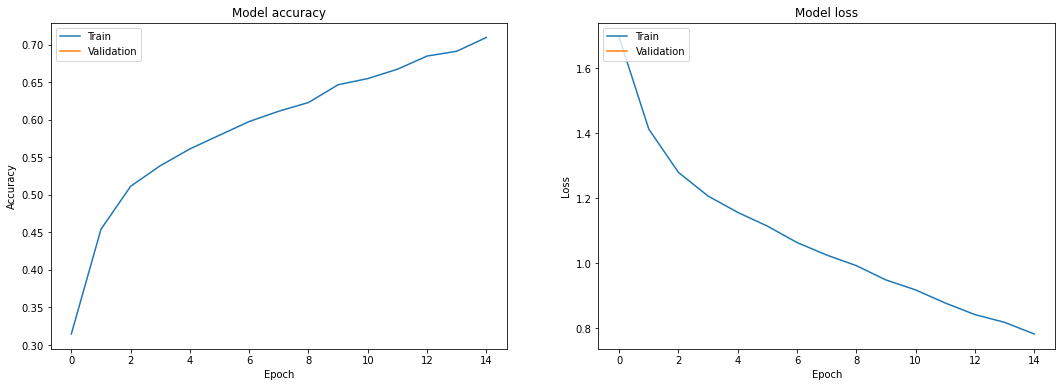

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(emotion_model_info.history['accuracy'])
axes[0].plot(emotion_model_info.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(emotion_model_info.history['loss'])
axes[1].plot(emotion_model_info.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [7]:
emotion_model.save('facial_emotions_model.h5')

(48, 48, 1)


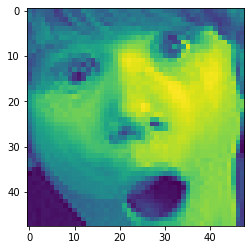

In [9]:
from tensorflow.keras.preprocessing import image
img_path=r'C:\Users\USER\Downloads\Face Emotion Expression Detection\Face_emotion_images\images\validation\surprise/176.jpg'
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [10]:
test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=emotion_model.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 0s 131ms/step
[0. 0. 0. 0. 0. 0. 1.]
The person facial emotion is: Surprise
